In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Pre-process Raw Data into Transmission Spectra

In [2]:
# VENUS IPTS-35945 paths
ipts_path = "/SNS/VENUS/IPTS-35945"
nexus_path = f"{ipts_path}/nexus"
autoreduce_base = f"{ipts_path}/shared/autoreduce/mcp/images"

# Working directory for output
working_dir = "./ipts_35945"
os.makedirs(working_dir, exist_ok=True)
spectra_dir = f"{working_dir}/spectra"
os.makedirs(spectra_dir, exist_ok=True)
twenty_dir = f"{working_dir}/twenty"
os.makedirs(twenty_dir, exist_ok=True)
# Create SAMMY working and output directories
sammy_working = Path(working_dir) / "sammy_working"
sammy_output = Path(working_dir) / "sammy_output"
sammy_working.mkdir(exist_ok=True)
sammy_output.mkdir(exist_ok=True)

In [3]:
# Test the dual-export (individual + combined) implementation
from pleiades.processing.normalization import normalization
from pleiades.processing import Roi, Facility

# All sample runs
open_beam_folder = f"{autoreduce_base}/Run_8021"
sample_folders = [
    f"{autoreduce_base}/Run_8022",
    f"{autoreduce_base}/Run_8023",
    f"{autoreduce_base}/Run_8024",
    # f"{autoreduce_base}/Run_8025",
    # f"{autoreduce_base}/Run_8026",
    # f"{autoreduce_base}/Run_8027"
]

In [4]:
transmissions = normalization(
    list_sample_folders=sample_folders,
    list_obs_folders=[open_beam_folder],
    nexus_path=nexus_path,
    facility=Facility.ornl,
    combine_mode=False,
    pc_uncertainty=0.005,
    output_folder=os.path.join(working_dir, "spectra"),
)

2025-09-18 19:22:50 | INFO     | pleiades.processing.normalization:normalization:91 - Using ORNL-specific normalization
olefile module not found
/SNS/users/8cz/github.com/PLEIADES/.pixi/envs/default/lib/python3.11/site-packages/dxchange/__init__.py:63: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
2025-09-18 19:22:51 | INFO     | pleiades.processing.normalization_ornl:normalization_ornl:199 - Loading 3 sample folders
2025-09-18 19:22:51 | INFO     | pleiades.utils.load:load:21 - loading 4367 files with extension .tif
2025-09-18 19:23:36 | DEBUG    | pleiades.processing.helper_ornl:load_spectra_file:42 - Found spectra file: Run_8022_20250423_April23_2025_MCP_TPX_Foil_Au_1_6C_Resonance_0001_2585092_Spectra.txt
2025-09-18 19:23:36 | INFO     | pleiades.utils.load:load:21 - 

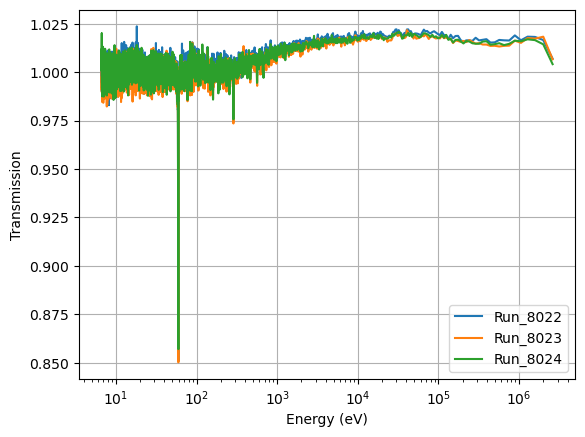

In [5]:
fig, ax = plt.subplots()
for transmission in transmissions:
    label = transmission.metadata.get("sample_folder", "Unknown").split("/")[-1]
    ax.plot(transmission.energy, transmission.transmission, label=label)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Transmission")
ax.set_xscale("log")
ax.grid()
ax.legend()
plt.show()

convert to sammy twenty format

In [6]:
from pleiades.sammy.io.data_manager import convert_csv_to_sammy_twenty, validate_sammy_twenty_format

# Define paths - use absolute path to be safe
input_dir = Path(spectra_dir)
output_dir = Path(twenty_dir)

# Debug: Check if input directory exists
print(f"Input directory: {input_dir}")
print(f"Input directory exists: {input_dir.exists()}")

# Convert all transmission CSV files to twenty format
csv_files = list(input_dir.glob("*_transmission.txt"))

print(f"Found {len(csv_files)} CSV files to convert:")
for csv_file in csv_files:
    print(f"  - {csv_file.name}")

if len(csv_files) == 0:
    print("No files found! Check the input directory path.")
    # List all files in the directory for debugging
    all_files = list(input_dir.glob("*"))
    print(f"All files in directory: {[f.name for f in all_files]}")
else:
    print("\nConverting to twenty format...")
    for csv_file in csv_files:
        # Create output filename: Run_8022_transmission.txt -> Run_8022_transmission.twenty
        twenty_file = output_dir / csv_file.name.replace(".txt", ".twenty")

        try:
            # Convert using existing function
            convert_csv_to_sammy_twenty(csv_file, twenty_file)

            # Validate the output
            if validate_sammy_twenty_format(twenty_file):
                print(f"✅ {csv_file.name} -> {twenty_file.name}")
            else:
                print(f"❌ {csv_file.name} -> validation failed")

        except Exception as e:
            print(f"❌ {csv_file.name} -> conversion failed: {e}")

    print(f"\nConversion complete! Output files in: {output_dir}")

2025-09-18 19:26:59 | INFO     | pleiades.sammy.io.data_manager:convert_csv_to_sammy_twenty:40 - Converting ipts_35945/spectra/Run_8022_transmission.txt to SAMMY twenty format: ipts_35945/twenty/Run_8022_transmission.twenty
2025-09-18 19:26:59 | INFO     | pleiades.sammy.io.data_manager:convert_csv_to_sammy_twenty:56 - Converted 4367 data points to twenty format
2025-09-18 19:26:59 | INFO     | pleiades.sammy.io.data_manager:validate_sammy_twenty_format:96 - File ipts_35945/twenty/Run_8022_transmission.twenty is valid SAMMY twenty format
2025-09-18 19:26:59 | INFO     | pleiades.sammy.io.data_manager:convert_csv_to_sammy_twenty:40 - Converting ipts_35945/spectra/Run_8023_transmission.txt to SAMMY twenty format: ipts_35945/twenty/Run_8023_transmission.twenty
2025-09-18 19:26:59 | INFO     | pleiades.sammy.io.data_manager:convert_csv_to_sammy_twenty:56 - Converted 4367 data points to twenty format
2025-09-18 19:26:59 | INFO     | pleiades.sammy.io.data_manager:validate_sammy_twenty_forma

Input directory: ipts_35945/spectra
Input directory exists: True
Found 3 CSV files to convert:
  - Run_8022_transmission.txt
  - Run_8023_transmission.txt
  - Run_8024_transmission.txt

Converting to twenty format...
✅ Run_8022_transmission.txt -> Run_8022_transmission.twenty
✅ Run_8023_transmission.txt -> Run_8023_transmission.twenty
✅ Run_8024_transmission.txt -> Run_8024_transmission.twenty

Conversion complete! Output files in: ipts_35945/twenty


## Configure Sammy Runner

In [7]:
# Step 1: Create JSON configuration and ENDF files using JsonManager
from pleiades.sammy.io.json_manager import JsonManager

print("🔧 Step 1: Creating JSON configuration and ENDF files for Au-197...")

json_manager = JsonManager()
json_path = json_manager.create_json_config(
    isotopes=["Au-197"],
    abundances=[1.0],  # 100% abundance for single isotope
    working_dir=working_dir,
    custom_global_settings={
        "forceRMoore": "yes",
        "purgeSpinGroups": "yes", 
        "fudge": "0.7"
    }
)

print(f"✅ JSON config created: {json_path}")
print(f"✅ ENDF files staged in: {working_dir}")

# List the files that were created
import os
endf_files = [f for f in os.listdir(working_dir) if f.endswith('.par')]
print(f"📄 Found {len(endf_files)} ENDF files: {endf_files}")

2025-09-18 19:27:08 | INFO     | pleiades.sammy.io.json_manager:__init__:165 - JsonManager initialized with Pydantic v2 models
2025-09-18 19:27:08 | INFO     | pleiades.sammy.io.json_manager:create_json_config:214 - Creating SAMMY workspace for 1 isotopes: ['Au-197']
2025-09-18 19:27:08 | INFO     | pleiades.sammy.io.json_manager:create_json_config:215 - Working directory: ipts_35945
2025-09-18 19:27:08 | INFO     | pleiades.sammy.io.json_manager:create_json_config:218 - Step 1: Staging ENDF files...
2025-09-18 19:27:08 | INFO     | pleiades.nuclear.isotopes.manager:get_isotope_info:167 - Getting isotope parameters for Au-197
2025-09-18 19:27:08 | INFO     | pleiades.nuclear.isotopes.manager:get_file_path:75 - Searching for mass.mas20 in cached files for FileCategory.ISOTOPES: {PosixPath('/SNS/users/8cz/github.com/PLEIADES/src/pleiades/nuclear/isotopes/files/isotopes.info'), PosixPath('/SNS/users/8cz/github.com/PLEIADES/src/pleiades/nuclear/isotopes/files/mass.mas20'), PosixPath('/SNS/

🔧 Step 1: Creating JSON configuration and ENDF files for Au-197...
✅ JSON config created: ipts_35945/config.json
✅ ENDF files staged in: ./ipts_35945
📄 Found 1 ENDF files: ['079-Au-197.B-VIII.0.par']


In [8]:
# Step 2: Generate INP file using PLEIADES multi-isotope generator
from pleiades.sammy.io.inp_manager import InpManager

print("🔧 Step 2: Generating INP file using PLEIADES...")

# Define Gold material properties (from IPTS-35945 sample characteristics)
au_material_props = {
    'element': 'Au',               # Element symbol
    'mass_number': 197,            # Mass number for Au-197
    'density_g_cm3': 19.32,        # Gold density (g/cm³)
    'thickness_mm': 0.025,         # Sample thickness: 0.025 mm (0.001 in)
    'atomic_mass_amu': 196.966569, # Au-197 atomic mass (AMU)
    'abundance': 1.0,              # 100% abundance for single isotope mode
    'min_energy': 1.0,            # Minimum energy in eV (to cover thermal range)
    'max_energy_eV': 200.0,       # Maximum energy in eV (based on transmission data range)
    'temperature_K': 293.6         # Room temperature (K)
}

print(f"📊 Material properties: {au_material_props}")

# Define resolution file with absolute path for security/control
resolution_file_path = Path(".") / "venus_resolution.dat"
print(f"📄 Resolution file path: {resolution_file_path}")
print(f"📄 Resolution file exists: {resolution_file_path.exists()}")

# Generate INP file using PLEIADES with absolute resolution path
inp_file = Path(working_dir) / "au_fitting.inp"
InpManager.create_multi_isotope_inp(
    inp_file,
    title="PLEIADES-generated Au-197 fitting for VENUS IPTS-35945",
    material_properties=au_material_props,
    resolution_file_path=resolution_file_path  # Use absolute path
)

print(f"✅ Generated INP file: {inp_file}")

# Show a sample of the generated INP content
print("\n📝 Sample INP content:")
with open(inp_file, 'r') as f:
    for i, line in enumerate(f):
        if i >= 10:  # Show first 10 lines
            break
        print(f"   {line.rstrip()}")

2025-09-18 19:27:15 | INFO     | pleiades.utils.logger:__init__:145 - logging initialized...


🔧 Step 2: Generating INP file using PLEIADES...
📊 Material properties: {'element': 'Au', 'mass_number': 197, 'density_g_cm3': 19.32, 'thickness_mm': 0.025, 'atomic_mass_amu': 196.966569, 'abundance': 1.0, 'min_energy': 1.0, 'max_energy_eV': 200.0, 'temperature_K': 293.6}
📄 Resolution file path: venus_resolution.dat
📄 Resolution file exists: True


2025-09-18 19:27:15 | INFO     | pleiades.sammy.io.inp_manager:create_multi_isotope_inp:480 - Successfully wrote multi-isotope SAMMY input file to ipts_35945/au_fitting.inp


✅ Generated INP file: ipts_35945/au_fitting.inp

📝 Sample INP content:
   PLEIADES-generated Au-197 fitting for VENUS IPTS-35945
   Au197      196.96657     0.001     200.0
   REICH-MOORE FORMALISM IS WANTED
   USE NEW SPIN GROUP Format
   USE TWENTY SIGNIFICANT DIGITS
   BROADENING IS WANTED
   INPUT IS ENDF/B FILE 2
   SOLVE BAYES EQUATIONS
   DO NOT SUPPRESS ANY INTERMEDIATE PRINTOUT
   CHI SQUARED IS WANTED


In [9]:
# Step 3: Set up SAMMY execution using LocalSammyRunner
from pleiades.sammy.backends.local import LocalSammyRunner
from pleiades.sammy.config import LocalSammyConfig
from pleiades.sammy.interface import SammyFilesMultiMode

print("🔧 Step 3: Setting up SAMMY execution...")

# Use the combined transmission data file
combined_data_file = Path(twenty_dir) / "Run_8022_transmission.twenty"

print(f"📄 Using combined data file: {combined_data_file}")
print(f"📄 Data file exists: {combined_data_file.exists()}")

# Create SammyFilesMultiMode container
files = SammyFilesMultiMode(
    input_file=inp_file,
    json_config_file=Path(json_path),
    data_file=combined_data_file,
    endf_directory=Path(working_dir)
)

print(f"📁 SAMMY working directory: {sammy_working}")
print(f"📁 SAMMY output directory: {sammy_output}")

# Create LocalSammyRunner configuration
config = LocalSammyConfig(
    sammy_executable=Path("/SNS/software/sammy/bin/sammy"),
    working_dir=sammy_working,
    output_dir=sammy_output
)

runner = LocalSammyRunner(config)
print("✅ LocalSammyRunner configured and ready")

🔧 Step 3: Setting up SAMMY execution...
📄 Using combined data file: ipts_35945/twenty/Run_8022_transmission.twenty
📄 Data file exists: True
📁 SAMMY working directory: ipts_35945/sammy_working
📁 SAMMY output directory: ipts_35945/sammy_output
✅ LocalSammyRunner configured and ready


## Fit for Number Densities

In [10]:
# Step 4: Execute SAMMY fitting
print("🚀 Step 4: Executing SAMMY JSON mode fitting...")

# Prepare the environment (copy/symlink files to working directory)
print("🔄 Preparing SAMMY environment...")
runner.prepare_environment(files)

# Execute SAMMY
print("⚡ Running SAMMY...")
result = runner.execute_sammy(files)

# Display execution results
print(f"\n📊 SAMMY Execution Results:")
print(f"   Success: {result.success}")
print(f"   Execution time: {result.runtime_seconds:.2f}s")
print(f"   Console output length: {len(result.console_output)} chars")

if result.error_message:
    print(f"   ⚠️  Error: {result.error_message[:200]}...")
    
if result.console_output and "Normal finish to SAMMY" in result.console_output:
    print(f"   ✅ SAMMY completed normally")
elif result.console_output:
    print(f"   ⚠️  Console output (last 300 chars): {result.console_output[-300:]}")

# Step 5: Collect outputs (copy results from working_dir to output_dir)
print(f"\n📥 Step 5: Collecting SAMMY output files...")
runner.collect_outputs(result=result)

# Check generated output files in the output directory
print(f"\n📂 SAMMY Output Files in {sammy_output}:")
expected_outputs = ["SAMMY.LPT", "SAMMY.LST", "SAMMY.ODF", "SAMMY.PAR", "SAMNDF.PAR", "SAMNDF.INP"]

found_outputs = []
for output_file in expected_outputs:
    output_path = sammy_output / output_file
    if output_path.exists():
        found_outputs.append(output_file)
        size_kb = output_path.stat().st_size / 1024
        print(f"   ✅ {output_file} ({size_kb:.1f} KB)")
    else:
        print(f"   ❌ {output_file} (missing)")

print(f"\n✅ Generated {len(found_outputs)}/{len(expected_outputs)} expected files")

# Cleanup
print("🧹 Cleaning up working directory...")
runner.cleanup()

2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:45 - Validating input files
2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:50 - Performing JSON-ENDF mapping validation
2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.backends.local:_validate_json_endf_mapping:100 - JSON-ENDF validation passed: 1 ENDF files verified
2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:54 - Moving files to working directory
2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:214 - Moving JSON mode files to working directory: ipts_35945/sammy_working
2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.interface:move_to_working_dir:253 - Symlinked ENDF file: 079-Au-197.B-VIII.0.par
2025-09-18 19:27:43 | DEBUG    | pleiades.sammy.backends.local:prepare_environment:58 - Environment preparation complete
2025-09-18 19:27:43 | INFO     | pleiades.sammy.backends.local:execute_sammy:110 - Star

🚀 Step 4: Executing SAMMY JSON mode fitting...
🔄 Preparing SAMMY environment...
⚡ Running SAMMY...


2025-09-18 19:27:45 | INFO     | pleiades.sammy.backends.local:execute_sammy:156 - SAMMY execution completed successfully for e5c1142b-f2d0-4e43-8e65-f5423ad00251
2025-09-18 19:27:45 | INFO     | pleiades.sammy.interface:collect_outputs:432 - Collecting outputs for execution e5c1142b-f2d0-4e43-8e65-f5423ad00251
2025-09-18 19:27:45 | DEBUG    | pleiades.sammy.interface:collect_outputs:443 - Found known output file: SAMNDF.PAR
2025-09-18 19:27:45 | DEBUG    | pleiades.sammy.interface:collect_outputs:443 - Found known output file: SAMMY.IO
2025-09-18 19:27:45 | DEBUG    | pleiades.sammy.interface:collect_outputs:443 - Found known output file: SAMMY.ODF
2025-09-18 19:27:45 | DEBUG    | pleiades.sammy.interface:collect_outputs:443 - Found known output file: SAMMY.LPT
2025-09-18 19:27:45 | DEBUG    | pleiades.sammy.interface:collect_outputs:443 - Found known output file: SAMMY.LST
2025-09-18 19:27:45 | DEBUG    | pleiades.sammy.interface:collect_outputs:443 - Found known output file: SAMNDF.


📊 SAMMY Execution Results:
   Success: True
   Execution time: 1.65s
   Console output length: 5489 chars
   ✅ SAMMY completed normally

📥 Step 5: Collecting SAMMY output files...

📂 SAMMY Output Files in ipts_35945/sammy_output:
   ✅ SAMMY.LPT (15.5 KB)
   ✅ SAMMY.LST (911.2 KB)
   ✅ SAMMY.ODF (191.0 KB)
   ✅ SAMMY.PAR (19.1 KB)
   ✅ SAMNDF.PAR (23.5 KB)
   ✅ SAMNDF.INP (1.8 KB)

✅ Generated 6/6 expected files
🧹 Cleaning up working directory...


## Analyze Results

2025-09-18 19:27:58 | INFO     | pleiades.sammy.io.lpt_manager:process_lpt_file:479 - Successfully read the file: ipts_35945/sammy_output/SAMMY.LPT
2025-09-18 19:27:58 | DEBUG    | pleiades.sammy.io.lpt_manager:process_lpt_file:490 - Split LPT content into 3 blocks.
2025-09-18 19:27:58 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_isotope_info:116 - Extracting isotope information...
2025-09-18 19:27:58 | INFO     | pleiades.sammy.io.lpt_manager:extract_results_from_string:415 - Isotope results not found.
2025-09-18 19:27:58 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_radius_info:189 - Extracting radius information...
2025-09-18 19:27:58 | INFO     | pleiades.sammy.io.lpt_manager:extract_results_from_string:418 - Radius results not found.
2025-09-18 19:27:58 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_broadening_info:261 - Extracting broadening information...
2025-09-18 19:27:58 | DEBUG    | pleiades.sammy.io.lpt_manager:extract_normalization_info:328 - Extracting nor

Energy range: 6.673e+00 - 1.999e+02 eV
Experimental transmission: 0.8508 - 1.0236
Theoretical transmission: 0.8593 - 1.0025


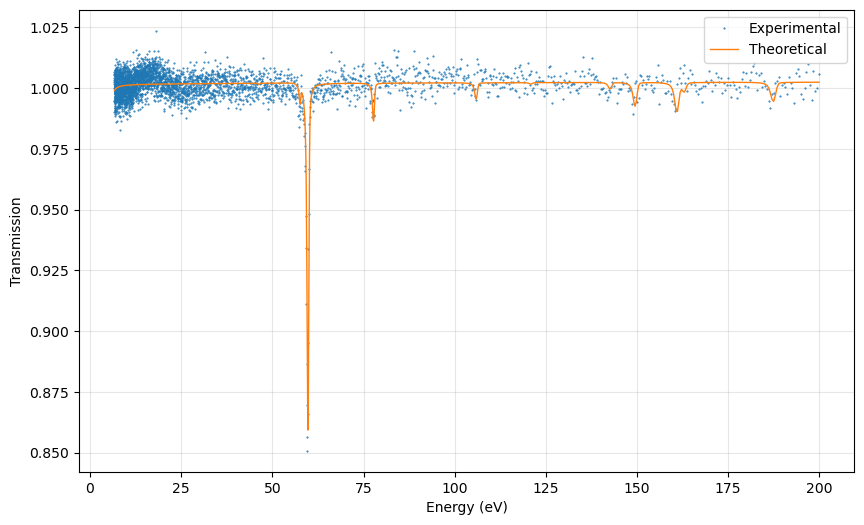

In [11]:
from pleiades.sammy.results.manager import ResultsManager

lpt_file_path = sammy_output / "SAMMY.LPT"
lst_file_path = sammy_output / "SAMMY.LST"

results_manager = ResultsManager(lpt_file_path=lpt_file_path, lst_file_path=lst_file_path)
data = results_manager.get_data()

print(f"Energy range: {data.energy.min():.3e} - {data.energy.max():.3e} eV")
print(f"Experimental transmission: {data.experimental_transmission.min():.4f} - {data.experimental_transmission.max():.4f}")
print(f"Theoretical transmission: {data.theoretical_transmission.min():.4f} - {data.theoretical_transmission.max():.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data.energy, data.experimental_transmission, '.', markersize=1, label='Experimental')
plt.plot(data.energy, data.theoretical_transmission, '-', linewidth=1, label='Theoretical')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()